In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('iris.csv',index_col='Id')#index_col='Id' it is additional column we can remove it or make it as our index
#pd.read_csv('iris.csv',index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [4]:
df.loc[df.Species==0,'Species']='Setosa'
df.loc[df.Species==1,'Species']='Versicolor'
df.loc[df.Species==2,'Species']='Virginica'

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.Species.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: Species, dtype: int64

## seprate predictors and target

In [10]:
X=df.iloc[:,:-1]
Y=df.Species

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=15)# random data will place into test and train

# Train Model

In [12]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

# Evaluate Model

In [13]:
Y_predict=model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
accuracy_score(Y_test, Y_predict)

0.9333333333333333

In [16]:
pd.crosstab(Y_test, Y_predict)

col_0,Setosa,Versicolor,Virginica
Species,,,
Setosa,8,0,0
Versicolor,0,12,1
Virginica,0,1,8


In [17]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.92      0.92      0.92        13
   Virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



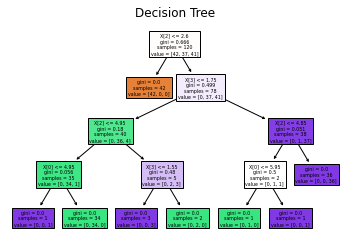

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
plot_tree(model,filled=True)
plt.title("Decision Tree")
plt.show()

In [20]:
from  six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'pydotplus'

In [21]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,filled=True,feature_names=X.columns,class_names=['Setosa',
'Versicolor','Virginica'],rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'export_graphviz' is not defined

In [57]:
y_predict=model.predict(X_train)
print('Train Data Accuracy:')
accuracy_score(Y_train,y_predict)

Train Data Accuracy:


1.0

In [58]:
X_Test_predict=model.predict(X_test)
print('TEst Data Accuracy:')
accuracy_score(Y_test,X_Test_predict)

TEst Data Accuracy:


0.9333333333333333